In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(color_codes=True)


In [ ]:
df = pd.read_excel("/content/Ovarian_patients_data.xlsx")

In [ ]:
# Removing special characters from dataframe
for col in df.columns:
  df=df.replace('[\t OR > OR <]','',regex=True)

In [ ]:
#dropping columns with more than 20% of missing values i.e CA72-4, NEU and Numbering i.e. SUBJECT_ID 
df1 = df.drop(['CA72-4','NEU','SUBJECT_ID'], axis=1)

In [ ]:
#splitting the dataset into training and testing dataset before preprocessing to get rid off later data leakage issues
from sklearn.model_selection import train_test_split

In [ ]:
#split data into dependent variables(X) and independent variable(y) that we would predict
X = df1.drop(["TYPE"], axis = 1)
y = df1["TYPE"]

In [ ]:
#changing datatype of columns to float and target column as integer 
X = X.astype(float)

In [ ]:
#Let’s split X and y using Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.75)
#get shape of train and test data
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (261, 47)
train size y :  (261,)
test size X :  (88, 47)
test size y :  (88,)


In [ ]:
#filling missing values using MICE method with iterative imputer with BayesianRidge()

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(tol = 1e-10, max_iter=100)

Iter_imputed = imp.fit_transform(X_train)
X_train = pd.DataFrame(Iter_imputed, columns=X_train.columns)

Iter_imputed = imp.transform(X_test) #to get rid of data leakage avoid fitting the test data
X_test = pd.DataFrame(Iter_imputed, columns=X_test.columns)

In [ ]:
#Flooring and Capping of outliers by quantile ranges of .01 and .90 respectively

num_col = X_train.select_dtypes(include=['float64']).columns.tolist()

X_train = X_train[num_col].apply(lambda x: x.clip(*x.quantile([0.1, 0.9])))

In [ ]:
#flooring and capping of test data with 0.1 andd 0.9 quantile respectively
X_test = X_test[num_col].apply(lambda x: x.clip(*x.quantile([0.1, 0.9])))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [ ]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.378545024325209


,cols,Yeo_Johnson_lambdas
0,AFP,-0.972358
1,AG,2.264943
2,Age,0.756346
3,ALB,3.079972
4,ALP,-0.304402
5,ALT,-0.497968
6,AST,-0.573979
7,BASO#,-13.003153
8,BASO%,-0.588092
9,BUN,0.200798


In [ ]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)
X_test_transformed2 = pd.DataFrame(X_test_transformed2,columns=X_test.columns)

In [3]:
X_train_transformed2 = pd.read_csv("/content/X_train.csv")
X_test_transformed2 = pd.read_csv("/content/X_test.csv")
y_train = pd.read_csv("/content/y_train.csv")
y_test = pd.read_csv("/content/y_test.csv")
#a = X_train_transformed2.shape
#print("shape of X_train : ", a )
X_train_transformed2.std().sum()
#print("describe() of X_train : ", b )

47.09029787383122

In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Create a list of all feature combinations
num_features = X_train_transformed2.shape[1]
all_combinations = []
for k in range(1, num_features + 1):
    all_combinations += combinations(range(num_features), k)

# Initialize variables to keep track of best accuracy and corresponding feature set
best_accuracy = 0
best_feature_set = None

# Loop over all feature combinations and evaluate logistic regression performance
for feature_set in all_combinations:
    feature_set = list(feature_set)
    X_train_subset = X_train_transformed2[:, feature_set]
    X_test_subset = X_test_transformed2[:, feature_set]
    lr = LogisticRegression()
    lr.fit(X_train_subset, y_train)
    accuracy = lr.score(X_test_subset, y_test)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_feature_set = feature_set

# Print best feature set and corresponding accuracy
print("Best feature set: ", best_feature_set)
print("Accuracy: ", best_accuracy)

# Create a bar plot of feature ranks
lr = LogisticRegression()
lr.fit(X_train_transformed2[:, best_feature_set], y_train)
feature_ranks = np.argsort(np.abs(lr.coef_))[0][::-1]
plt.bar(range(len(best_feature_set)), feature_ranks)
plt.xticks(range(len(best_feature_set)), np.array(feature_names)[best_feature_set][feature_ranks])
plt.xlabel('Features')
plt.ylabel('Rank')
plt.title('Feature Ranks - Brute Force')
plt.show()


In [ ]:
from itertools import combinations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Define the number of features to select
k_features = 10

# Define the brute force feature selection function
def brute_force_feature_selection(X_train_transformed2, X_test_transformed2, y_train, y_test, k_features):
    # Get the number of features
    n_features = X_train_transformed2.shape[1]

    # Create a list of all possible feature combinations
    feature_combinations = list(combinations(range(n_features), k_features))

    # Initialize variables to keep track of the best features and the best accuracy score
    best_features = None
    best_score = 0

    # Loop through all possible feature combinations
    for feature_set in feature_combinations:
        # Create a new training set using only the selected features
        X_train_new = X_train_transformed2.iloc[:, list(feature_set)]

        # Create a new testing set using only the selected features
        X_test_new = X_test_transformed2.iloc[:, list(feature_set)]

        # Train a k-nearest neighbors classifier on the new training set
        clf = KNeighborsClassifier()
        clf.fit(X_train_new, y_train)

        # Predict the class labels of the new testing set
        y_pred = clf.predict(X_test_new)

        # Calculate the accuracy score of the classifier
        score = accuracy_score(y_test, y_pred)

        # Update the best features and best accuracy score if the current score is better
        if score > best_score:
            best_features = feature_set
            best_score = score

    # Print the best feature set and best accuracy score
    print("Best features:", best_features)
    print("Best accuracy score:", best_score)

    # Return the best feature set
    return best_features

# Call the brute force feature selection function
best_features = brute_force_feature_selection(X_train_transformed2, X_test_transformed2, y_train, y_test, k_features)

# Plot the feature ranks as a bar plot
feature_ranks = np.zeros(n_features)
feature_ranks[list(best_features)] = 1
plt.bar(range(n_features), feature_ranks)
plt.xlabel('Feature index')
plt.ylabel('Feature rank')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize logistic regression model
model = LogisticRegression(max_iter=10000)

# Perform brute force feature selection
num_features = X.shape[1]
best_features = []
best_score = 0
for i in range(1, num_features+1):
    for j in range(num_features):
        if j not in best_features:
            features = best_features + [j]
            X_selected = X.iloc[:, features]
            model.fit(X_selected, y)
            y_pred = model.predict(X_selected)
            score = accuracy_score(y, y_pred)
            if score > best_score:
                best_features = features
                best_score = score

# Visualize feature ranks as a bar plot
coefs = np.abs(model.coef_)[0]
feature_names = X.columns[best_features]
sorted_indices = np.argsort(coefs)[::-1]
sorted_coefs = coefs[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]
plt.bar(range(len(sorted_coefs)), sorted_coefs)
plt.xticks(range(len(sorted_coefs)), sorted_feature_names, rotation=90)
plt.show()


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import *

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_transformed2[selected_feature_names],y_train)

LogisticRegression()

In [ ]:
y_pred_train_lr = lr.predict(X_train_transformed2[selected_feature_names])

In [ ]:
acc_train_lr = accuracy_score(y_train,y_pred_train_lr)

In [ ]:
acc_train_lr

0.8850574712643678

In [ ]:
y_pred_lr = lr.predict(X_test_transformed2[selected_feature_names])

In [ ]:
acc_lr = accuracy_score(y_test, y_pred_lr)

In [ ]:
acc_lr

0.8522727272727273

In [ ]:
X_train_transformed3 = X_train_transformed2[selected_feature_names]
X_test_transformed3 = X_test_transformed2[selected_feature_names]

In [ ]:
lr2 = LogisticRegression()
lr2.fit(X_train_transformed3,y_train)

LogisticRegression()

In [ ]:
y_pred_train_lr2 = lr2.predict(X_train_transformed3)
accuracy_score(y_train,y_pred_train_lr2)

0.9272030651340997

In [ ]:
y_pred_lr2 = lr2.predict(X_test_transformed3)
accuracy_score(y_test, y_pred_lr2)

0.8295454545454546

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Define the hyperparameters to search over
hyperparameters = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'dual': [True, False],
    'tol': [1e-4, 1e-3, 1e-2],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'intercept_scaling': [0.1, 0.5, 1, 1.5, 2],
    'class_weight': [{0: 0.0, 1: 1.0},{0: 0.0019839679358717435,1: 0.9980160320641283},{0: 0.003967935871743487,1: 0.9960320641282565},{0: 0.0059519038076152305,1: 0.9940480961923848},{0: 0.007935871743486974,1:0.9543687374749499},{0:0.047615230460921844,1: 0.9523847695390781},{0: 0.04959919839679359,1: 0.9504008016032064},{0: 0.05158316633266533,1: 0.9484168336673346},{0: 0.05356713426853708,1: 0.9464328657314629},{0: 0.055551102204408814,1: 0.9444488977955912},{0: 0.05753507014028056,1: 0.9424649298597194}],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50, 100, 200],
}

# Create a GridSearchCV object with the logistic regression model and hyperparameters
grid_search = GridSearchCV(lr, hyperparameters, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring='roc_auc')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_transformed2, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# **Support Vector Machine**

In [ ]:
from sklearn import svm
sv = svm.SVC( probability=True)
sv.fit(X_train_transformed2, y_train)

SVC(probability=True)

In [ ]:
y_train_pred_sv = sv.predict(X_train_transformed2)
acc_train_sv = accuracy_score(y_train,y_train_pred_sv)
acc_train_sv

0.9425287356321839

In [ ]:
y_pred_sv = sv.predict(X_test_transformed2)
acc_sv = accuracy_score(y_test, y_pred_sv)
print("Accuracy:", acc_sv)

Accuracy: 0.875


In [ ]:
# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'],
    'coef0': [0.0, 0.1, 0.5, 1.0],
    'shrinking': [True, False],
    'tol': [1e-3, 1e-4, 1e-5],
    'max_iter': [-1, 100, 500, 1000]
}

# Define the grid search object
grid_search = GridSearchCV(estimator=sv, param_grid=param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

# Fit the grid search object to the training data
grid_search.fit(X_train_transformed2, y_train)

# Print the best hyperparameters and their associated score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_transformed2, y_train)

In [ ]:
y_pred_train_rf = rf.predict(X_train_transformed2)

In [ ]:
acc_train_rf = accuracy_score(y_train,y_pred_train_rf)

In [ ]:
acc_train_rf

In [ ]:
y_pred_rf = rf.predict(X_test_transformed2)

In [ ]:
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", acc_rf)

In [ ]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Define the grid search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1,scoring='roc_auc')

# Fit the grid search object to the training data
grid_search.fit(X_train_transformed2, y_train)

# Print the best hyperparameters and their associated score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.datasets import make_classification

# Define the cross-validation scheme
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(rf, X_train_transformed2[selected_feature_names], y_train, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Compute the average score
print("Average score:", scores.mean())


Cross-validation scores: [0.92592593 0.96153846 0.84615385 0.92307692 0.80769231 0.84615385
 0.96153846 0.80769231 0.84615385 0.88461538]
Average score: 0.8810541310541309


# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:
nb = GaussianNB()
nb.fit(X_train_transformed2, y_train)

y_pred_train_nb = nb.predict(X_train_transformed2)
acc_train_nb = accuracy_score(y_train,y_pred_train_nb)
acc_train_nb


0.8659003831417624

In [ ]:
y_pred_nb = nb.predict(X_test_transformed2)
acc_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", acc_nb)

Accuracy: 0.8636363636363636


In [ ]:
# Define the hyperparameter grid to search
param_grid = {
    'priors': [None],
    'var_smoothing': [1e-9],
}

# Define the grid search object
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

# Fit the grid search object to the training data
grid_search.fit(X_train_transformed2, y_train)

# Print the best hyperparameters and their associated score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


# **XgBoost**

In [ ]:
import xgboost as xgb


In [ ]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train_transformed2, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred_train_xg = xgb.predict(X_train_transformed2)
accuracy_score(y_train, y_pred_train_xg)

1.0

In [ ]:
y_pred_xg = xgb.predict(X_test_transformed2)
acc_xg = accuracy_score(y_test, y_pred_xg)
acc_xg

0.8522727272727273

In [ ]:
# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 500, 1000],
    'gamma': [0, 0.1, 1],
    'subsample': [0.5, 0.8, 1],
    'colsample_bytree': [0.5, 0.8, 1],
}

# Define the grid search object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

# Fit the grid search object to the training data
grid_search.fit(X_train_transformed2, y_train)

# Print the best hyperparameters and their associated score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


# **Artificial Neural Network**

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(60, input_shape=(X_train_transformed2.shape[1],), activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_transformed2,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
5/5 [==============================] - 2s 83ms/step - loss: 0.6799 - accuracy: 0.4904 - val_loss: 0.6438 - val_accuracy: 0.6226
Epoch 2/100
5/5 [==============================] - 0s 12ms/step - loss: 0.6413 - accuracy: 0.6538 - val_loss: 0.6104 - val_accuracy: 0.7736
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 0.6029 - accuracy: 0.7740 - val_loss: 0.5729 - val_accuracy: 0.7925
Epoch 4/100
5/5 [==============================] - 0s 15ms/step - loss: 0.5645 - accuracy: 0.8125 - val_loss: 0.5330 - val_accuracy: 0.7925
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 0.5219 - accuracy: 0.8462 - val_loss: 0.4927 - val_accuracy: 0.7925
Epoch 6/100
5/5 [==============================] - 0s 14ms/step - loss: 0.4745 - accuracy: 0.8510 - val_loss: 0.4509 - val_accuracy: 0.7925
Epoch 7/100
5/5 [==============================] - 0s 16ms/step - loss: 0.4296 - accuracy: 0.8606 - val_loss: 0.4090 - val_accuracy: 0.8302
Epoch 8/100
5/5 [===

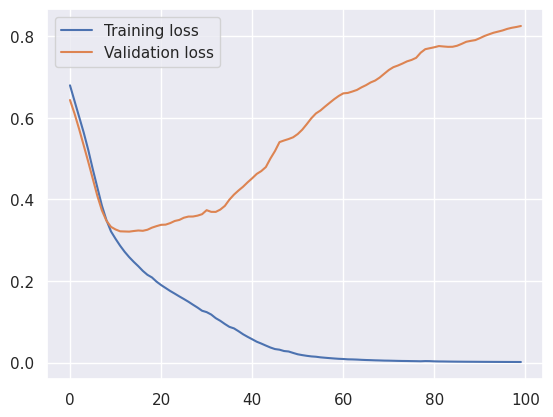

In [ ]:
#plt.plot(history.history['accuracy'], label = "Train Accuracy")
#plt.plot(history.history['val_accuracy'], label = "Validation Accuracy")
plt.plot(history.history['loss'], label = "Training loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [ ]:
y_pred_ann = model.predict(X_train_transformed2)
y_pred_ann =(y_pred_ann > 0.5)
accuracy_score(y_train,  y_pred_ann)

9/9 [==============================] - 0s 2ms/step


0.9731800766283525

In [ ]:
y_pred_prob = model.predict(X_test_transformed2)
y_pred_prob = (y_pred_prob > 0.5)
accuracy_score(y_test, y_pred_prob)

3/3 [==============================] - 0s 4ms/step


0.8409090909090909

In [ ]:
y_pred_mlp = np.array([ 1 if i > 0.5 else 0 for i in y_pred_prob]) 

# **metrics**

In [ ]:

acc_mlp = accuracy_score(y_true = y_test, y_pred = y_pred_mlp)
con_mlp = confusion_matrix(y_true = y_test, y_pred = y_pred_mlp)
f1_mlp = f1_score(y_true = y_test, y_pred = y_pred_mlp)
rec_mlp = recall_score(y_true = y_test, y_pred = y_pred_mlp)
pre_mlp = precision_score(y_test,y_pred_mlp)
auc_mlp = roc_auc_score(y_test, y_pred_prob)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, y_pred_prob)

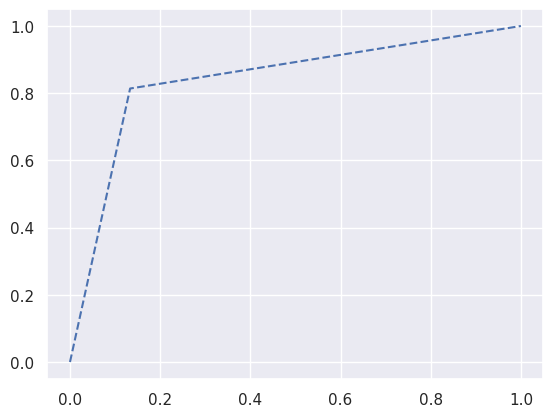

In [ ]:
plt.plot(mlp_fpr, mlp_tpr, linestyle='--', label='MLP prediction (AUROC = %0.3f)' % auc_mlp)


In [ ]:
mlp_precision, mlp_recall, _ = precision_recall_curve(y_test, y_pred_prob)


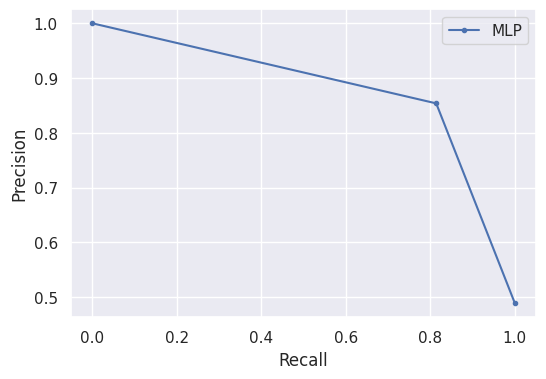

In [ ]:

plt.figure(figsize=(6,4))
plt.plot(mlp_recall, mlp_precision, marker='.', label='MLP')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
result = pd.DataFrame()
result['Actual Label'] = y_test
result['Logistic Regression Prediction'] = y_pred_lr
result['Naive bayes Prediction'] = y_pred_nb
result['Support Vector Machine Prediction'] = y_pred_sv
result['Random forest Prediction'] = y_pred_rf
result['XgBoost Prediction'] = y_pred_xg
result['MLP Prediction'] = y_pred_mlp

In [ ]:
#print('Precision score of Logistic regression' ,
pre_lr = precision_score(y_test,y_pred_lr)
#print('Precision score of Naive Bayes' ,
pre_nb = precision_score(y_test,y_pred_nb)
#print('Precision score of Support Vector Machine' ,
pre_sv = precision_score(y_test,y_pred_sv)
#print('Precision score of Random Forest' ,
pre_rf = precision_score(y_test,y_pred_rf)
#print('Precision score of XgBoost' ,
pre_xg = precision_score(y_test,y_pred_xg)
#print('Precision score of MLP' ,
pre_mlp = precision_score(y_test,y_pred_mlp)

In [ ]:
#print('Recall of Logistic Regression',
rec_lr = recall_score(y_test,y_pred_lr)
#print('Recall of Naive Bayes',
rec_nb =  recall_score(y_test,y_pred_nb)
#print('Recall of Support Vector Machine',
rec_sv =  recall_score(y_test,y_pred_sv)
#print('Recall of Random Forest',
rec_rf =  recall_score(y_test,y_pred_rf)
#print('Recall of XgBoost',
rec_xg =  recall_score(y_test,y_pred_xg)
#print('Precision score of MLP' ,
rec_mlp =  recall_score(y_test,y_pred_mlp)

In [ ]:
#print('Recall of Logistic Regression',
f1_lr = f1_score(y_test,y_pred_lr)
#print('Recall of Naive Bayes',
f1_nb =  f1_score(y_test,y_pred_nb)
#print('Recall of Support Vector Machine',
f1_sv =  f1_score(y_test,y_pred_sv)
#print('Recall of Random Forest',
f1_rf =  f1_score(y_test,y_pred_rf)
#print('Recall of XgBoost',
f1_xg =  f1_score(y_test,y_pred_xg)
#print('Precision score of MLP' ,
f1_mlp =  f1_score(y_test,y_pred_mlp)

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test_transformed2)
nb_probs = nb.predict_proba(X_test_transformed2)
sv_probs = sv.predict_proba(X_test_transformed2)
xg_probs = xgb.predict_proba(X_test_transformed2)
lr_probs = lr.predict_proba(X_test_transformed2)

In [ ]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
sv_probs = sv_probs[:, 1]
lr_probs = lr_probs[:, 1]
xg_probs = xg_probs[:, 1]

In [ ]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
sv_auc = roc_auc_score(y_test, sv_probs)
xg_auc = roc_auc_score(y_test, xg_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [ ]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
sv_fpr, sv_tpr, _ = roc_curve(y_test, sv_probs)
xg_fpr, xg_tpr, _ = roc_curve(y_test, xg_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

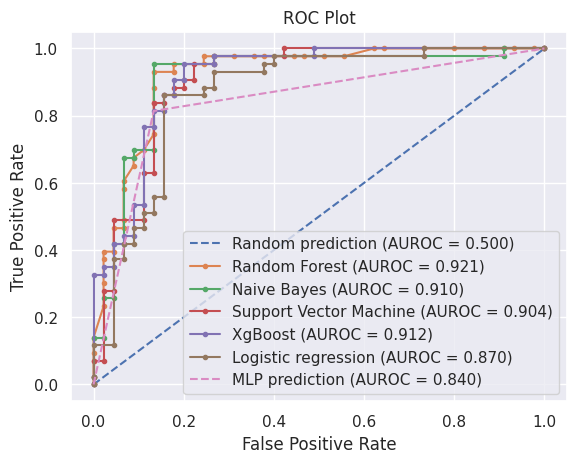

In [ ]:

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(sv_fpr, sv_tpr, marker='.', label='Support Vector Machine (AUROC = %0.3f)' % sv_auc)
plt.plot(xg_fpr, xg_tpr, marker='.', label='XgBoost (AUROC = %0.3f)' % xg_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic regression (AUROC = %0.3f)' % lr_auc)
plt.plot(mlp_fpr, mlp_tpr, linestyle='--', label='MLP prediction (AUROC = %0.3f)' % auc_mlp)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() 
plt.savefig("/content/AUROC_CURVE.png", dpi=800)# 
# Show plot
plt.show()

In [ ]:

result = pd.DataFrame()
result['Algorithm'] = ['XgBoost','RandomForest','LogisticRegression', 'Naive bayes', 'Multilayer perceptron', 'Support Vector Machine']
result['Accuracy score'] = [acc_xg,acc_rf,acc_lr,acc_nb,acc_mlp,acc_sv]
result['Precision'] = [pre_xg,pre_rf,pre_lr,pre_nb,pre_mlp,pre_sv]
result['Recall'] = [rec_xg,rec_rf,rec_lr,rec_nb,rec_mlp,rec_sv]
result['F1 score'] = [f1_xg,f1_rf,f1_lr,f1_nb,f1_mlp,f1_sv]
result['AUROC'] = [xg_auc,rf_auc,lr_auc,nb_auc, auc_mlp,sv_auc]

In [ ]:
result

,Algorithm,Accuracy score,Precision,Recall,F1 score,AUROC
0,XgBoost,0.840909,0.822222,0.860465,0.840909,0.912145
1,RandomForest,0.897727,0.869565,0.930233,0.898876,0.920930
2,LogisticRegression,0.840909,0.837209,0.837209,0.837209,0.869767
3,Naive bayes,0.863636,0.860465,0.860465,0.860465,0.909561
4,Multilayer perceptron,0.840909,0.853659,0.813953,0.833333,0.840310
5,Support Vector Machine,0.852273,0.840909,0.860465,0.850575,0.903876


# **After Hyperparameter tuning**

In [ ]:
lr_hyper = LogisticRegression(C = 0.1, class_weight = {0: 0.04959919839679359, 1: 0.9504008016032064}, dual = False, fit_intercept = False, intercept_scaling = 0.5, max_iter = 200, multi_class = 'multinomial', penalty = 'none', solver = 'sag', tol = 0.01, warm_start = False)
lr_hyper.fit(X_train_transformed2, y_train)

LogisticRegression(C=0.1,
                   class_weight={0: 0.04959919839679359, 1: 0.9504008016032064},
                   fit_intercept=False, intercept_scaling=0.5, max_iter=200,
                   multi_class='multinomial', penalty='none', solver='sag',
                   tol=0.01)

In [ ]:
sv_hyper = svm.SVC(C = 0.1, coef0 = 1.0, degree = 2, gamma = 'scale', kernel = 'poly', max_iter = -1, shrinking = True, tol = 0.001, probability=True)
sv_hyper.fit(X_train_transformed2, y_train)

SVC(C=0.1, coef0=1.0, degree=2, kernel='poly', probability=True)

In [ ]:
rf_hyper = RandomForestClassifier(bootstrap = True, criterion = 'gini', max_depth = 10, max_features = 'log2', min_samples_leaf = 4, min_samples_split = 2, n_estimators = 100)
rf_hyper.fit(X_train_transformed2, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=4)

In [ ]:
nb_hyper = GaussianNB(var_smoothing = 1e-09)
nb_hyper.fit(X_train_transformed2, y_train)

GaussianNB()

In [ ]:
import xgboost as xgb
xgb_hyper = xgb.XGBClassifier(colsample_bytree = 0.8, gamma = 0.1, learning_rate = 0.1, max_depth = 3, n_estimators = 100, subsample = 0.5)
xgb_hyper.fit(X_train_transformed2, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
rf_hyper_probs = rf_hyper.predict_proba(X_test_transformed2)
nb_hyper_probs = nb_hyper.predict_proba(X_test_transformed2)
sv_hyper_probs = sv_hyper.predict_proba(X_test_transformed2)
xg_hyper_probs = xgb_hyper.predict_proba(X_test_transformed2)
lr_hyper_probs = lr_hyper.predict_proba(X_test_transformed2)

In [ ]:
rf_hyper_probs = rf_hyper_probs[:, 1]
nb_hyper_probs = nb_hyper_probs[:, 1]
sv_hyper_probs = sv_hyper_probs[:, 1]
lr_hyper_probs = lr_hyper_probs[:, 1]
xg_hyper_probs = xg_hyper_probs[:, 1]

In [ ]:
r_auc = roc_auc_score(y_test, r_probs)
rf_hyper_auc = roc_auc_score(y_test, rf_hyper_probs)
nb_hyper_auc = roc_auc_score(y_test, nb_hyper_probs)
sv_hyper_auc = roc_auc_score(y_test, sv_hyper_probs)
xg_hyper_auc = roc_auc_score(y_test, xg_hyper_probs)
lr_hyper_auc = roc_auc_score(y_test, lr_hyper_probs)

In [ ]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_hyper_fpr, rf_hyper_tpr, _ = roc_curve(y_test, rf_hyper_probs)
nb_hyper_fpr, nb_hyper_tpr, _ = roc_curve(y_test, nb_hyper_probs)
sv_hyper_fpr, sv_hyper_tpr, _ = roc_curve(y_test, sv_hyper_probs)
xg_hyper_fpr, xg_hyper_tpr, _ = roc_curve(y_test, xg_hyper_probs)
lr_hyper_fpr, lr_hyper_tpr, _ = roc_curve(y_test, lr_hyper_probs)

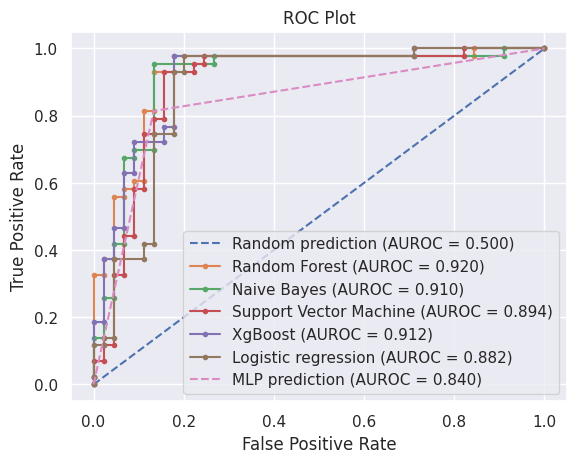

In [ ]:

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_hyper_fpr, rf_hyper_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_hyper_auc)
plt.plot(nb_hyper_fpr, nb_hyper_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_hyper_auc)
plt.plot(sv_hyper_fpr, sv_hyper_tpr, marker='.', label='Support Vector Machine (AUROC = %0.3f)' % sv_hyper_auc)
plt.plot(xg_hyper_fpr, xg_hyper_tpr, marker='.', label='XgBoost (AUROC = %0.3f)' % xg_hyper_auc)
plt.plot(lr_hyper_fpr, lr_hyper_tpr, marker='.', label='Logistic regression (AUROC = %0.3f)' % lr_hyper_auc)
plt.plot(mlp_fpr, mlp_tpr, linestyle='--', label='MLP prediction (AUROC = %0.3f)' % auc_mlp)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() 
plt.savefig("/content/AUROC_CURVE.png", dpi=800)# 
# Show plot
plt.show()